# UET 22-23II - INT3404 1 - Image Processing Midterm

### Full name: Duong Nguyen Viet Anh - ID: 21020273
#### In this project, we're going to complete 2 part : 
##### 1. Making data for 'Spot the Differences' game 
##### 2. Solve game

# Preparing

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline

## Demo a image

(304, 303, 3)

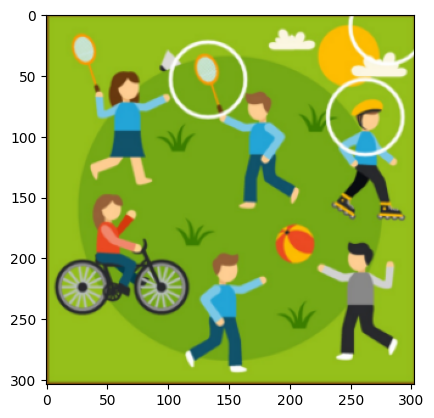

In [297]:
image = cv2.imread('res/demo.png')
plt.imshow(image[:,::,::-1])
image.shape

## Contours Detection

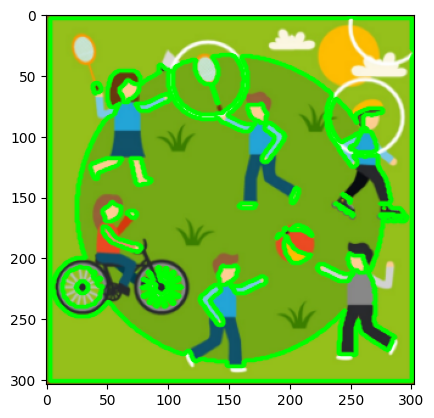

In [307]:
image = cv2.imread('res/demo.png')

img_gray = cv2.cvtColor (image, cv2.COLOR_BGR2GRAY)

# apply binary thresholding
ret, thresh = cv2.threshold(img_gray, 150, 255, cv2.THRESH_BINARY)

# detect the contours on the binary image using cv2.CHAIN_APPROX_NONE
contours, hierarchy = cv2.findContours(image=thresh, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)
                                      
# draw contours on the original image
image_copy = image.copy()
cv2.drawContours(image=image_copy, contours=contours, contourIdx=-1, color=(0, 255, 0), thickness=2, lineType=cv2.LINE_AA)
                
# see the results
plt.imshow(image_copy[:,::,::-1])

## Connected Component Labeling

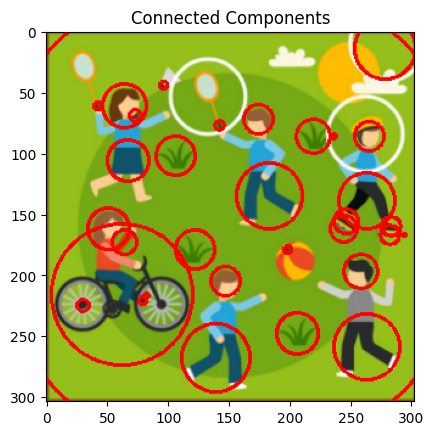

In [296]:
# Load the input image
img = cv2.imread('res/demo.png')

# Convert the input image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply binary thresholding to the grayscale image
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

# Perform Connected Components Labeling on the binary image
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(thresh)

# Create a copy of the input image for output
output = img.copy()

# Edit the entities in the input image based on their labels
for i in range(1, num_labels):
    mask = labels == i
    x, y, w, h, area = stats[i]
    radius = int((w + h) / 3)
    cv2.circle(img, (x + w//2, y + h//2), radius, (0, 0, 255), 2)

plt.imshow(img[:,::,::-1])
plt.title('Connected Components')
plt.show()

# Functions

## 1st function(s): Draw a circle/rectangle/square in random position and random color

In [53]:
def draw_a_circle(img, radius):
    h, w, _ = img.shape
    cv2.circle(img, (np.random.randint(0,w-10), np.random.randint(0,h-10)), radius, 
           (np.random.randint(0,255),np.random.randint(0,255), np.random.randint(0,255)), -1)
    return img

In [54]:
def draw_a_rectangle(img, width, height):
    h, w, _= img.shape
    x = np.random.randint(0,w-30)
    y= np.random.randint(0,h-30)
    rectangle_top_left = (x,y)
    rectangle_bottom_right = (x+width, y + height)
    cv2.rectangle(img, rectangle_top_left, rectangle_bottom_right, 
                  (np.random.randint(0,255),np.random.randint(0,255), np.random.randint(0,255)), -1)
    return img

In [55]:
def draw_a_square(img, width):
    h,w,_ = img.shape
    x = np.random.randint(0,w-30)
    y = np.random.randint(0,h-30)
    square_top_left = (x, y)
    square_bottom_right = (x + width, y + width)
    cv2.rectangle(img, square_top_left, square_bottom_right, 
                 (np.random.randint(0,255),np.random.randint(0,255), np.random.randint(0,255)), -1)
    return img

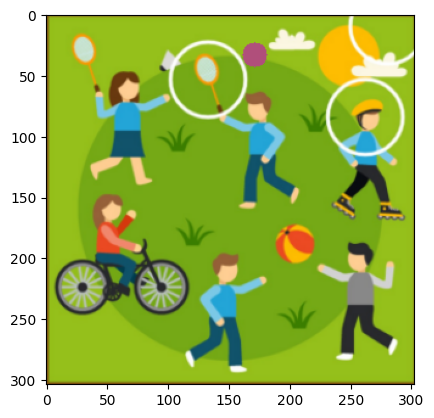

In [123]:
img = cv2.imread('res/demo.png')
img = draw_a_circle(img,10)
plt.imshow(img[:,::,::-1])

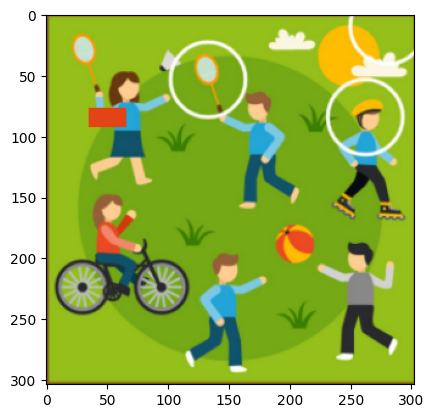

In [170]:
img = cv2.imread('res/demo.png')
img = draw_a_rectangle(img,30,15)
plt.imshow(img[:,::,::-1])

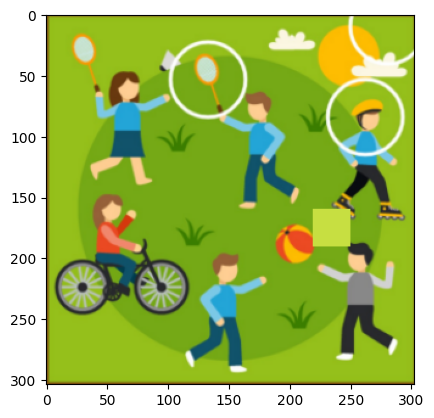

In [172]:
img = cv2.imread('res/demo.png')
img = draw_a_square(img,30)
plt.imshow(img[:,::,::-1])

## 2nd function(s): INSERT A IMAGE INTO INPUT IMAGE

In [324]:
def insert_into_image(inp_img, ins_img):

    # Get dimensions of addition image
    height, width, channels = ins_img.shape
    i_h, i_w, i_c = inp_img.shape

    # Define the region of interest (ROI) in the input image where the addition image will be inserted
    x_offset = np.random.randint(10,i_w - width - 10)
    y_offset = np.random.randint(10,i_h - height - 10)
    roi = inp_img[y_offset:y_offset+height, x_offset:x_offset+width]

    # Add the addition image to the ROI
    result = cv2.addWeighted(roi, 0.5, ins_img, 0.5, 0)

    # Put the result back into the original image
    inp_img[y_offset:y_offset+height, x_offset:x_offset+width] = result

    return inp_img

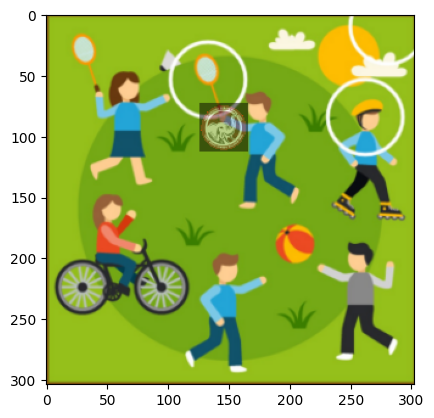

In [325]:
img = cv2.imread('res/demo.png')
ins_img = cv2.imread('res/add.png')
img = insert_into_image(img,ins_img)
plt.imshow(img[:,::,::-1])

## 3rd function(s): ADD A COPY OF A LABEL IN A IMAGE INTO IT

In [326]:
def copy_a_label(img):
    # Convert input image to grayscale
    gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply Otsu's thresholding to segment the label
    _, threshold_image = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

    # Perform connected component labeling to extract the labels
    num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(threshold_image)

    # Select a random label (excluding the background label)
    label = random.randint(1, num_labels-1)

    # Extract the bounding box of the label
    x, y, w, h, area = stats[label]

    # Crop a rectangle around the label in the input image
    label_image = img[y:y+h, x:x+w]

    img = insert_into_image(img,label_image)
    return img

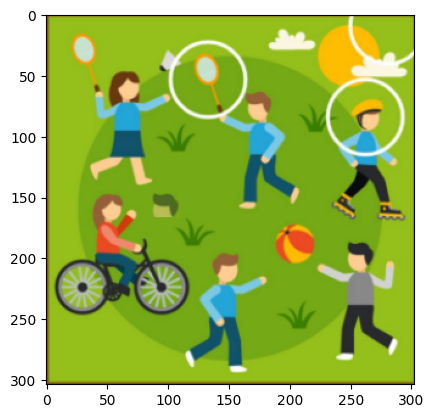

In [331]:
img = cv2.imread('res/demo.png')
img = copy_a_label(img)
plt.imshow(img[:,::,::-1])

## 4th function(s): FLIP HORIZONTAL/VERTICAL A LABEL IN A IMAGE

In [333]:
def flip_horizontal(img):
    # Convert image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Threshold image to binary
    ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

    # Apply connected component labeling
    ret, labels = cv2.connectedComponents(thresh)

    # Random a label
    label_to_flip = random.randint(1, ret-2) # Change this to the label you want to flip

    # Find bounding box of label to flip
    non_zero_pixels = np.nonzero(labels == label_to_flip)
    top = np.min(non_zero_pixels[0])
    left = np.min(non_zero_pixels[1])
    bottom = np.max(non_zero_pixels[0])
    right = np.max(non_zero_pixels[1])

    # Extract label region
    label_region = img[top:bottom+1, left:right+1]

    # Flip label region
    label_region = cv2.flip(label_region, 1)

    # Replace flipped label region in original image
    img[top:bottom+1, left:right+1] = label_region

    return img

In [342]:
def flip_vertical(img):
    # Convert image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Threshold image to binary
    ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

    # Apply connected component labeling
    ret, labels = cv2.connectedComponents(thresh)

    # Flip vertical
    label_to_flip = random.randint(3,ret-2) # Change this to the label you want to flip

    # Find bounding box of label to flip
    non_zero_pixels = np.nonzero(labels == label_to_flip)
    top = np.min(non_zero_pixels[0])
    left = np.min(non_zero_pixels[1])
    bottom = np.max(non_zero_pixels[0])
    right = np.max(non_zero_pixels[1])

    # Extract label region
    label_region = img[top:bottom+1, left:right+1]

    label_region = cv2.flip(label_region, 0)

    # Replace flipped label region in original image
    img[top:bottom+1, left:right+1] = label_region

    return img

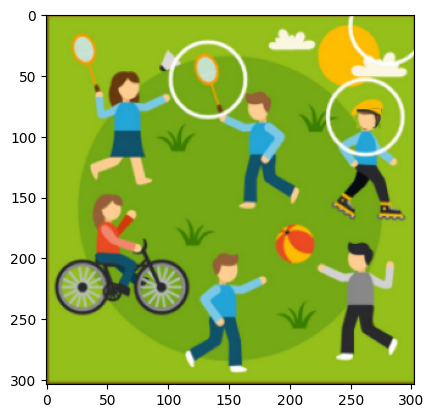

In [340]:
img = cv2.imread('res/demo.png')
img = flip_horizontal(img)
plt.imshow(img[:,::,::-1])

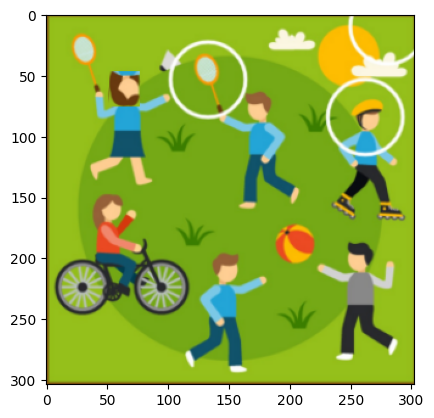

In [343]:
img = cv2.imread('res/demo.png')
img = flip_vertical(img)
plt.imshow(img[:,::,::-1])

## 5th function(s): DELETE (OR HIDING) A LABEL ON A IMAGE

In [45]:
def hide_contour(image, contour):
    # Create a copy of the original image
    image_copy = image.copy()

    # Create a mask image for the selected contour
    mask = np.zeros(image.shape[:2], dtype=np.uint8)
    cv2.drawContours(mask, [contour], -1, 255, cv2.FILLED)

    # Find the bounding box of the selected contour
    x, y, w, h = cv2.boundingRect(contour)

    # Extract the region of interest (ROI) from the original image
    roi = image_copy[y:y+h, x:x+w]

    # Create a mask for the ROI
    roi_mask = np.zeros((h, w), dtype=np.uint8)
    cv2.drawContours(roi_mask, [contour - (x, y)], -1, 255, cv2.FILLED)

    # Set the pixels inside the contour to the same color as the background
    bg_color = np.mean(image_copy, axis=(0,1)).astype(np.uint8)
    roi[roi_mask != 0] = bg_color

    # Replace the ROI in the original image with the modified version
    image_copy[y:y+h, x:x+w] = roi

    return image_copy

In [46]:
def change_contour_color(image, contours, min_w, max_w, min_h, max_h):
    # Filter contours based on size
    filtered_contours = []
    for contour in contours:
        area = cv2.contourArea(contour)
        h, w, num_channels = contour.shape
        if min_w <= w <= max_w and min_h <= h <= max_h:
            filtered_contours.append(contour)

    # Choose a random contour from filtered contours
    if filtered_contours:
        contour = random.choice(filtered_contours)
    else:
        contour = random.choice(contours)

    # Hide the chosen contour
    image_copy = hide_contour(image, contour)

    return image_copy

In [344]:
def delete_hiding_contour(image):
    img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    ret, thresh = cv2.threshold(img_gray, 150, 255, cv2.THRESH_BINARY)
    contours, hierarchy = cv2.findContours(image=thresh, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)

    h, w, num_channels = image.shape
    img = change_contour_color(image, contours, 100, w/2, 100, h/2)
    
    return img

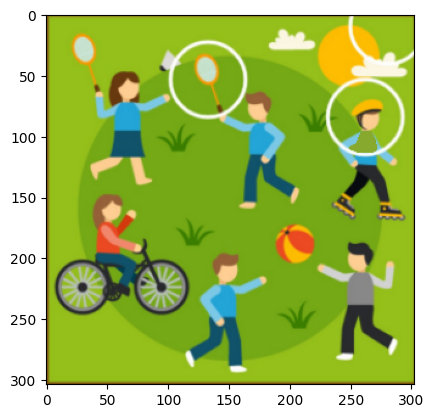

In [63]:
img = cv2.imread('res/demo.png')
img = delete_hiding_contour(img)
plt.imshow(img[:,::,::-1])

### Another way - Using OpenCV.inpant() function

In [115]:
def hiding_inpaint(img):
    # Convert the image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Threshold the image to binarize it
    _, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

    # Perform connected component labeling
    output = cv2.connectedComponentsWithStats(thresh, connectivity=8)
    num_labels = output[0] - 1

    # Get the statistics and labels from the output
    num_labels = output[0]
    labels = output[1]
    stats = output[2]
    centroids = output[3]

    # Choose the label you want to hide
    label_to_hide = np.random.randint(random.randint(2,num_labels - 1))

    # Create a mask to hide the label
    mask = np.zeros_like(thresh)
    mask[labels == label_to_hide] = 255

    # Use inpainting to fill in the masked area
    inpainted = cv2.inpaint(img, mask, 3, cv2.INPAINT_TELEA)

    return inpainted

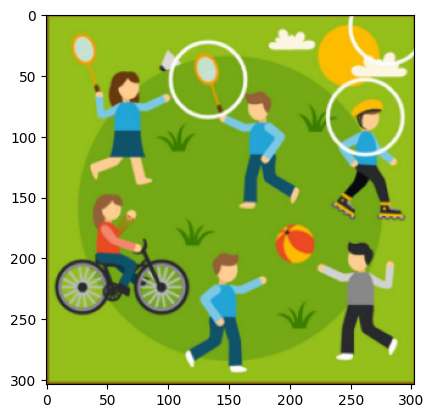

In [117]:
img = cv2.imread('res/demo.png')
img = hiding_inpaint(img)
plt.imshow(img[:,::,::-1])

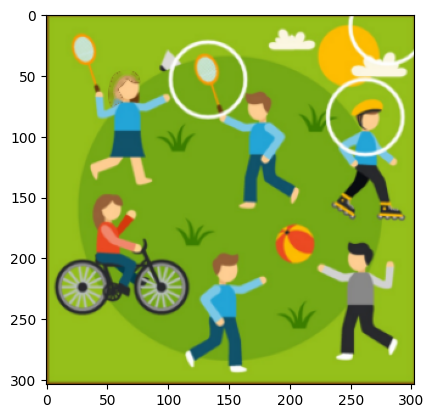

In [119]:
img = cv2.imread('res/demo.png')
img = hiding_inpaint(img)
plt.imshow(img[:,::,::-1])

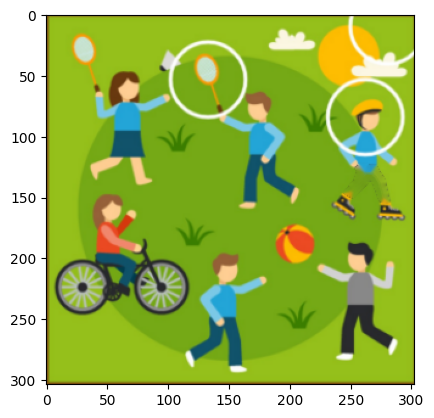

In [122]:
img = cv2.imread('res/demo.png')
img = hiding_inpaint(img)
plt.imshow(img[:,::,::-1])

## 6th function(s): 'MAKE' A NEW LABEL: CHANGE THE COLOR

### Using Contours Detection

In [294]:
def change_contour_color(image, contours, min_w, max_w, min_h, max_h):
    # filter contours based on size
    filtered_contours = []
    for contour in contours:
        area = cv2.contourArea(contour)
        h,w,num_channels = contour.shape
        if min_w <= w <= max_w and min_h <= h <=max_h:
            filtered_contours.append(contour)

    # choose a random contour from filtered contours
    if filtered_contours:
        contour = random.choice(filtered_contours)
    else:
        contour = random.choice(contours)

    # create a black mask image with the same size as the input image
    mask = np.zeros(image.shape[:2], dtype=np.uint8)

    # draw the chosen contour on the mask
    cv2.drawContours(mask, [contour], -1, 255, thickness=cv2.FILLED)

    # randomly choose a new color
    new_color = (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))

    # apply the new color to the contour in the original image
    image_copy = image.copy()
    image_copy[mask != 0] = new_color

    return image_copy

def contours_change_color(image):
    
    img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # apply binary thresholding
    ret, thresh = cv2.threshold(img_gray, 150, 255, cv2.THRESH_BINARY)

    # detect the contours on the binary image using cv2.RETR_TREE
    contours, hierarchy = cv2.findContours(image=thresh, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)

    # choose a random contour within the size range to display
    h,w,num_channels = image.shape
    
    img = change_contour_color(image, contours, 100, w/2, 100, h/2)
    return img

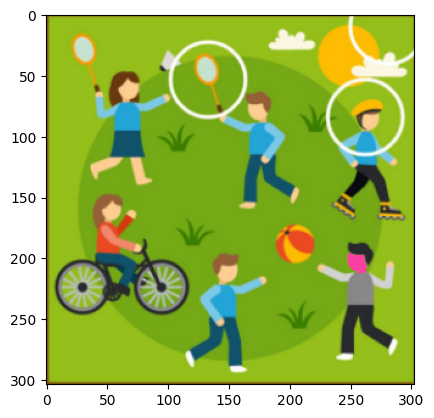

In [293]:
img = cv2.imread('res/demo.png')
img = contours_change_color(img)
plt.imshow(img[:,::,::-1])

### Using Connected Component Labeling

In [218]:
def modify_label (img):

    # Convert the input image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply binary thresholding to the grayscale image
    ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

    # Perform Connected Components Labeling on the binary image
    num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(thresh)

    # Define the labels to be highlighted and their corresponding colors
    highlighted_labels = {9: [random.randint(0,255), random.randint(0,255), random.randint(0,255)], 
                          2: [random.randint(0,255), random.randint(0,255), random.randint(0,255)], 
                          7: [random.randint(0,255), random.randint(0,255), random.randint(0,255)]}

    # Create a copy of the input image for output
    output = img.copy()

    # Highlight the entities in the input image with selected colors
    for i in range(1, num_labels):
        if i in highlighted_labels:
            mask = labels == i
            output[mask] = highlighted_labels[i]

    # Merge the highlighted labels with the original input image
    result = cv2.addWeighted(img, 0.7, output, 0.3, 0)
    
    return result

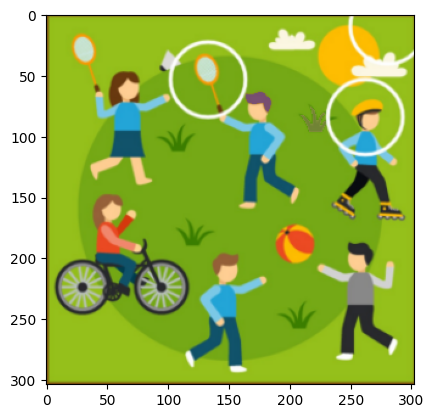

In [346]:
img = cv2.imread('res/demo.png')
img = modify_label(img)
plt.imshow(img[:,::,::-1])

In [223]:
def modify_label_random(img):

    # Convert the input image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply binary thresholding to the grayscale image
    ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

    # Perform Connected Components Labeling on the binary image
    num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(thresh)

    # Define the labels to be highlighted and their corresponding colors
    highlighted_labels = {random.randint(2,num_labels-1): [random.randint(0,255), random.randint(0,255), random.randint(0,255)], 
                          random.randint(2,num_labels-1): [random.randint(0,255), random.randint(0,255), random.randint(0,255)], 
                          random.randint(2,num_labels-1): [random.randint(0,255), random.randint(0,255), random.randint(0,255)]}

    # Create a copy of the input image for output
    output = img.copy()

    # Highlight the entities in the input image with selected colors
    for i in range(1, num_labels):
        if i in highlighted_labels:
            mask = labels == i
            output[mask] = highlighted_labels[i]

    # Merge the highlighted labels with the original input image
    result = cv2.addWeighted(img, 0.7, output, 0.3, 0)
    
    return result

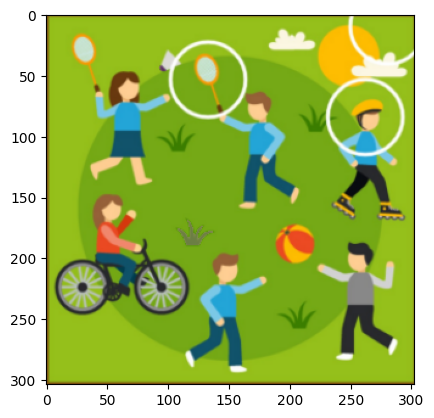

In [226]:
img = cv2.imread('res/demo.png')
img = modify_label_random(img)
cv2.imwrite('d2.png', img)
plt.imshow(img[:,::,::-1])


# MAKE GAME DATA

## 1. MAKE DATA GAME LEVEL 1

### Use: draw_a_shape (circle, rectangle, square)

#### Define a fuction:

In [123]:
def game_data_level1(img):
    img = draw_a_circle(img, 10)
    img = draw_a_rectangle(img, 25, 10)
    img = draw_a_square(img,15)
    img = draw_a_circle(img,8)
    img = draw_a_rectangle(img, 20,12)
    img = draw_a_square(img,9)
    return img

#### Demo

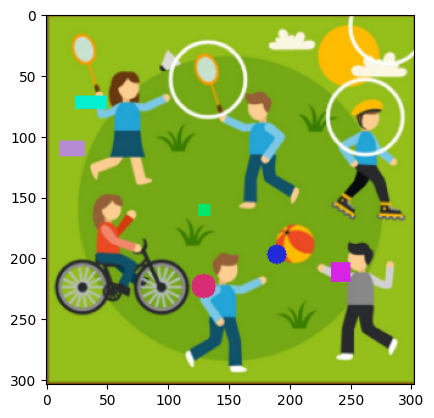

In [129]:
img = cv2.imread('res/demo.png')
img = game_data_level1(img)
plt.imshow(img[:,::,::-1])

#### Save image

In [130]:
cv2.imwrite('res/level1.png',img)

True

## 2. MAKE DATA GAME LEVEL 2

### Use: Level 1, insert and hiding

#### Define a function

In [132]:
def game_data_level2_way1(img, add_img):
    img = game_data_level1(img)
    img = insert_into_image(img, add_img)
    img = delete_hiding_contour(img)
    return img

In [135]:
def game_data_level2_way2(img, add_img):
    img = game_data_level1(img)
    img = insert_into_image(img, add_img)
    img = hiding_inpaint(img)
    return img

#### Demo and save image

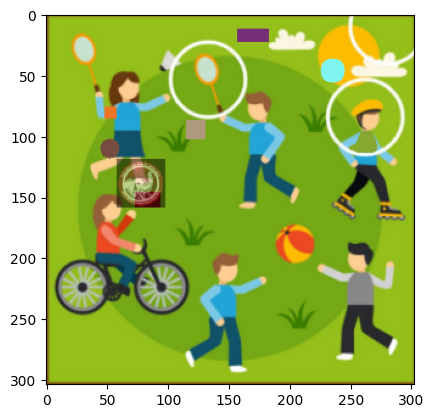

In [156]:
img = cv2.imread('res/demo.png')
add_img = cv2.imread('res/add.png')
img = game_data_level2_way1(img,add_img)
plt.imshow(img[:,::,::-1])

In [157]:
cv2.imwrite('res/level2_way1.png',img)

True

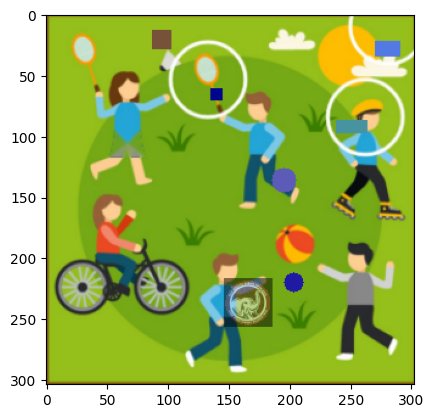

In [141]:
img = cv2.imread('res/demo.png')
add_img = cv2.imread('res/add.png')
img = game_data_level2_way2(img,add_img)
plt.imshow(img[:,::,::-1])

In [142]:
cv2.imwrite('res/level2_way2.png',img)

True

## 3. MAKE DATA GAME LEVEL 3

### Use: Level 1, copy, flip horizontal and change label's color

#### Define a function

In [268]:
def game_data_level3(img):
    img = game_data_level1(img)
    img = copy_a_label(img)
    img = flip_horizontal(img)
    img = modify_label(img)
    return img

#### Demo

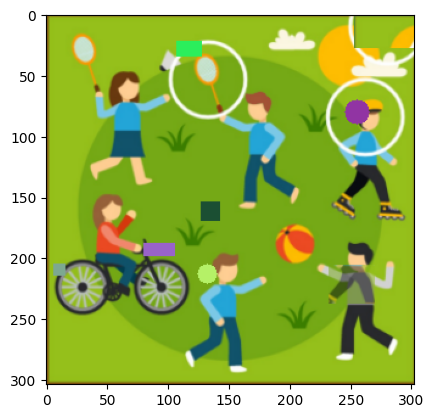

In [271]:
img = cv2.imread('res/demo.png')
img = game_data_level3(img)
plt.imshow(img[:,::,::-1])

#### Save image

In [272]:
cv2.imwrite('res/level3.png',img)

True

## 4. MAKE DATA GAME LEVEL 4

### Use: Level 1, hiding, copy, flip vertical and change label's color

#### Define a function

In [227]:
def game_data_level4(img):
    img = hiding_inpaint(img)
    img = copy_a_label(img)
    img = flip_vertical(img)
    img = game_data_level1(img)
    img = modify_label(img)
    img = modify_label_random(img)
    return img

#### Demo

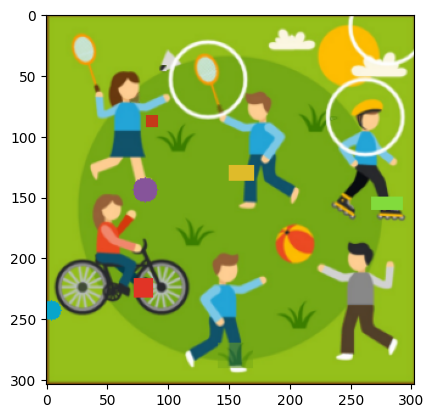

In [231]:
img = cv2.imread('res/demo.png')
img = game_data_level4(img)
plt.imshow(img[:,::,::-1])

#### Save image

In [232]:
cv2.imwrite('res/level4.png',img)

True

## 5. MAKE DATA GAME LEVEL 5

### Use: full functions

#### Define a function

In [244]:
def game_data_level5(inp_img, ins_img):
    inp_img = hiding_inpaint(inp_img)
    inp_img = insert_into_image(inp_img, ins_img)
    inp_img = delete_hiding_label(inp_img)
    inp_img = copy_a_label(inp_img)
    inp_img = copy_a_label(inp_img)
    inp_img = modify_label(inp_img)
    inp_img = modify_label_random(inp_img)
    inp_img = modify_label_random(inp_img)
    inp_img = flip_horizontal(inp_img)
    inp_img = flip_horizontal(inp_img)
    inp_img = flip_vertical(inp_img)
    inp_img = game_data_level1(inp_img)
    return inp_img

#### Demo

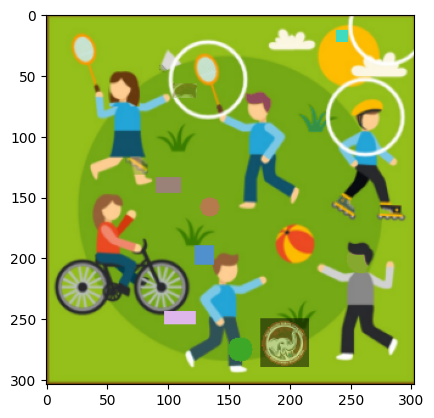

In [250]:
img = cv2.imread('res/demo.png')
add_img = cv2.imread('res/add.png')
img = game_data_level5(img, add_img)
plt.imshow(img[:,::,::-1])

#### Save image

In [251]:
cv2.imwrite('res/level5.png',img)

True

# SOLVE GAME

### PROGRAM FOR SOLVING

In [277]:
def solve_spot_the_differences (img1, img2):

    # Find the absolute difference between the two images
    diff = cv2.absdiff(img1, img2)

    # Convert the difference image to grayscale
    gray = cv2.cvtColor(diff, cv2.COLOR_BGR2GRAY)

    # Apply a threshold to the grayscale image to create a binary image
    _, thresh = cv2.threshold(gray, 10, 255, cv2.THRESH_BINARY)

    # Find contours in the binary image
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Draw circles around the contours in the original images
    for contour in contours:
        (x, y, w, h) = cv2.boundingRect(contour)
        radius = int((w + h) / 3)
        cv2.circle(img1, (x + w//2, y + h//2), radius, (0, 0, 255), 1)
        cv2.circle(img2, (x + w//2, y + h//2), radius, (0, 0, 255), 1)

    # Create a new blank image with the same height and the combined width
    h,w,num_channels = img1.shape
    
    #Create blank img
    combined_img = np.zeros((h, w + w, 3), np.uint8)
    
    # Copy the first image to the left half of the blank image
    combined_img[:, :w] = img1

    # Copy the second image to the right half of the blank image
    combined_img[:, w:] = img2

    return combined_img

### DEMO SOLVE LEVEL 1

(-0.5, 605.5, 303.5, -0.5)

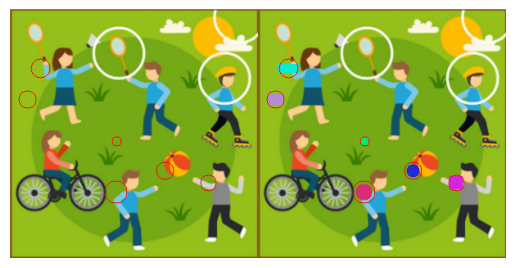

In [347]:
img1 = cv2.imread('res/demo.png')
img2 = cv2.imread('res/level1.png')
plt.imshow(solve_spot_the_differences(img1, img2)[:,::,::-1])
plt.axis('off')

In [348]:
cv2.imwrite('res/solve_level1.png',solve_spot_the_differences(img1,img2))

True

### DEMO SOLVE LEVEL 2

(-0.5, 605.5, 303.5, -0.5)

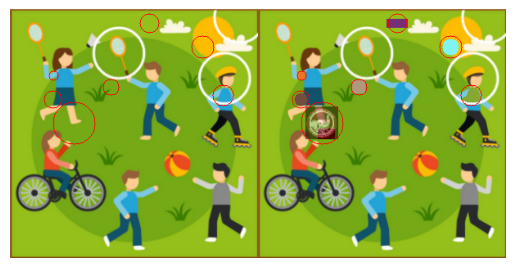

In [349]:
img1 = cv2.imread('res/demo.png')
img2 = cv2.imread('res/level2_way1.png')
plt.imshow(solve_spot_the_differences(img1, img2)[:,::,::-1])
plt.axis('off')

In [350]:
cv2.imwrite('res/solve_level2_way1.png',solve_spot_the_differences(img1,img2))

True

(-0.5, 605.5, 303.5, -0.5)

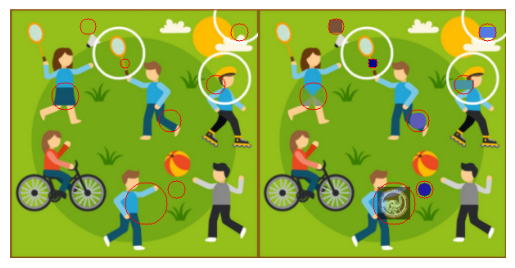

In [351]:
img1 = cv2.imread('res/demo.png')
img2 = cv2.imread('res/level2_way2.png')
plt.imshow(solve_spot_the_differences(img1, img2)[:,::,::-1])
plt.axis('off')

In [352]:
cv2.imwrite('res/solve_level2_way2.png',solve_spot_the_differences(img1,img2))

True

### DEMO SOLVE LEVEL 3

(-0.5, 605.5, 303.5, -0.5)

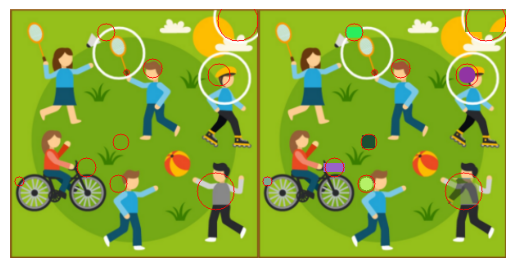

In [353]:
img1 = cv2.imread('res/demo.png')
img2 = cv2.imread('res/level3.png')
plt.imshow(solve_spot_the_differences(img1, img2)[:,::,::-1])
plt.axis('off')

In [354]:
cv2.imwrite('res/solve_level3.png',solve_spot_the_differences(img1,img2))

True

### DEMO SOLVE LEVEL 4

(-0.5, 605.5, 303.5, -0.5)

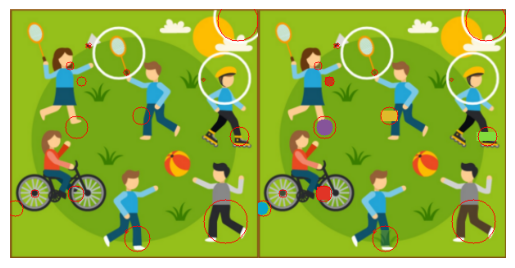

In [355]:
img1 = cv2.imread('res/demo.png')
img2 = cv2.imread('res/level4.png')
plt.imshow(solve_spot_the_differences(img1, img2)[:,::,::-1])
plt.axis('off')

In [356]:
cv2.imwrite('res/solve_level4.png',solve_spot_the_differences(img1,img2))

True

### DEMO SOLVE LEVEL 5

(-0.5, 605.5, 303.5, -0.5)

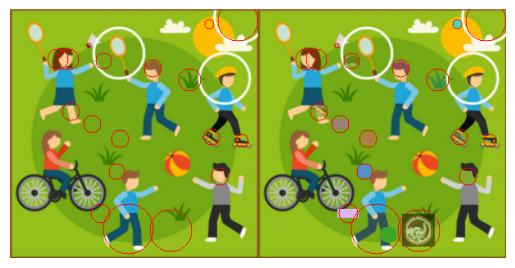

In [357]:
img1 = cv2.imread('res/demo.png')
img2 = cv2.imread('res/level5.png')
plt.imshow(solve_spot_the_differences(img1, img2)[:,::,::-1])
plt.axis('off')

In [358]:
cv2.imwrite('res/solve_level5.png',solve_spot_the_differences(img1,img2))

True